<a href="https://colab.research.google.com/github/21800040/Kwon_Jihyun/blob/master/Deagu_PM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/21800040/Kwon_Jihyun.git

Cloning into 'Kwon_Jihyun'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 17 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (17/17), done.


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import operator



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def file2matrix(filename):
  file = open(filename)
  n = len(file.readlines())
  return_matrix = np.zeros((n,3))
  class_labals = []
  file = open(filename)
  index = 0
  for line in file.readlines():
    line = line.strip()
    tokens = line.split('\t')
    return_matrix[index, :] = tokens[0:3]
    class_labels.append(tokens[-1])

In [5]:
df_2 = pd.read_csv('/content/drive/My Drive/COVID-19/sidoAirInfo_2.csv')
df_3 = pd.read_csv('/content/drive/My Drive/COVID-19/sidoAirInfo_3.csv')
df_4 = pd.read_csv('/content/drive/My Drive/COVID-19/sidoAirInfo_4.csv')
Time = pd.read_csv('/content/drive/My Drive/COVID-19/Time.csv')



Time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [6]:
patient = Time.loc[:,['date' ,'confirmed']]
patient.head(10)


,date,confirmed
0,2020-01-20,1
1,2020-01-21,1
2,2020-01-22,1
3,2020-01-23,1
4,2020-01-24,2
5,2020-01-25,2
6,2020-01-26,3
7,2020-01-27,4
8,2020-01-28,4
9,2020-01-29,4


In [7]:
df_total = pd.concat([df_2, df_3, df_4]) 
df_total.head(25)

,날짜,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주,세종
0,2020-02-29,24.0,20.0,30.0,20.0,15.0,24.0,16.0,27.0,22.0,30.0,33.0,20.0,17.0,23.0,21.0,16.0,34.0
1,2020-02-28,25.0,21.0,26.0,28.0,20.0,23.0,21.0,31.0,22.0,26.0,38.0,29.0,18.0,22.0,24.0,19.0,30.0
2,2020-02-27,13.0,16.0,14.0,15.0,42.0,28.0,15.0,21.0,13.0,27.0,41.0,43.0,35.0,15.0,20.0,35.0,35.0
3,2020-02-26,18.0,19.0,19.0,17.0,14.0,19.0,19.0,19.0,12.0,20.0,23.0,17.0,15.0,18.0,17.0,26.0,23.0
4,2020-02-25,20.0,12.0,15.0,20.0,23.0,10.0,12.0,20.0,21.0,20.0,19.0,13.0,23.0,16.0,12.0,50.0,23.0
5,2020-02-24,35.0,27.0,35.0,29.0,24.0,29.0,31.0,39.0,41.0,37.0,31.0,28.0,20.0,30.0,25.0,22.0,36.0
6,2020-02-23,23.0,26.0,23.0,20.0,23.0,26.0,24.0,25.0,27.0,28.0,27.0,25.0,22.0,26.0,23.0,27.0,27.0
7,2020-02-22,72.0,59.0,65.0,71.0,76.0,70.0,54.0,75.0,60.0,72.0,79.0,72.0,74.0,65.0,58.0,87.0,72.0
8,2020-02-21,59.0,44.0,57.0,46.0,40.0,58.0,47.0,60.0,59.0,64.0,55.0,49.0,37.0,52.0,43.0,26.0,66.0
9,2020-02-20,58.0,43.0,54.0,48.0,34.0,49.0,43.0,58.0,43.0,57.0,49.0,42.0,34.0,45.0,41.0,34.0,60.0


In [8]:
df_sample = df_total.loc[:,'대구']
df_sample.head(10)

0    30.0
1    26.0
2    14.0
3    19.0
4    15.0
5    35.0
6    23.0
7    65.0
8    57.0
9    54.0
Name: 대구, dtype: float64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0, 0.5, 'PM')

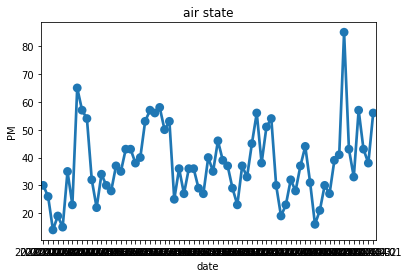

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pointplot(data = df_total ,x = '날짜', y = '대구')


plt.title('air state')
plt.xlabel('date')
plt.ylabel('PM')


Text(0, 0.5, 'confirmed num')

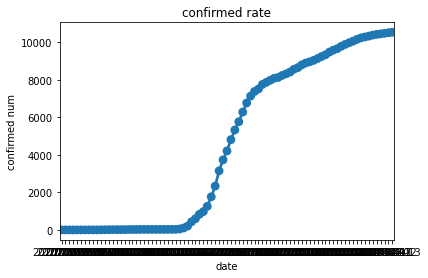

In [10]:
sns.pointplot(data = patient ,x = 'date', y = 'confirmed')


plt.title('confirmed rate')
plt.xlabel('date')
plt.ylabel('confirmed num')


In [11]:
pd.merge(patient, df_total, left_on = 'date', right_on = '날짜' ) #단순한 병합

,date,confirmed,날짜,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주,세종
0,2020-02-18,31,2020-02-18,23.0,23.0,22.0,20.0,20.0,25.0,21.0,25.0,26.0,25.0,24.0,21.0,18.0,22.0,20.0,25.0,24.0
1,2020-02-19,51,2020-02-19,33.0,32.0,32.0,32.0,26.0,31.0,27.0,35.0,28.0,37.0,32.0,27.0,23.0,28.0,28.0,25.0,38.0
2,2020-02-20,104,2020-02-20,58.0,43.0,54.0,48.0,34.0,49.0,43.0,58.0,43.0,57.0,49.0,42.0,34.0,45.0,41.0,34.0,60.0
3,2020-02-21,204,2020-02-21,59.0,44.0,57.0,46.0,40.0,58.0,47.0,60.0,59.0,64.0,55.0,49.0,37.0,52.0,43.0,26.0,66.0
4,2020-02-22,433,2020-02-22,72.0,59.0,65.0,71.0,76.0,70.0,54.0,75.0,60.0,72.0,79.0,72.0,74.0,65.0,58.0,87.0,72.0
5,2020-02-23,602,2020-02-23,23.0,26.0,23.0,20.0,23.0,26.0,24.0,25.0,27.0,28.0,27.0,25.0,22.0,26.0,23.0,27.0,27.0
6,2020-02-24,833,2020-02-24,35.0,27.0,35.0,29.0,24.0,29.0,31.0,39.0,41.0,37.0,31.0,28.0,20.0,30.0,25.0,22.0,36.0
7,2020-02-25,977,2020-02-25,20.0,12.0,15.0,20.0,23.0,10.0,12.0,20.0,21.0,20.0,19.0,13.0,23.0,16.0,12.0,50.0,23.0
8,2020-02-26,1261,2020-02-26,18.0,19.0,19.0,17.0,14.0,19.0,19.0,19.0,12.0,20.0,23.0,17.0,15.0,18.0,17.0,26.0,23.0
9,2020-02-27,1766,2020-02-27,13.0,16.0,14.0,15.0,42.0,28.0,15.0,21.0,13.0,27.0,41.0,43.0,35.0,15.0,20.0,35.0,35.0


In [37]:
comb_data = pd.merge(patient, df_total.rename(columns = {'날짜':'date'})) #겹치는 날짜 병합
#필요없는 열 제거
fix_comb_data = comb_data.loc[:,['date' ,'confirmed','대구']]
fix_comb_data.head(10)


,date,confirmed,대구
0,2020-02-18,31,22.0
1,2020-02-19,51,32.0
2,2020-02-20,104,54.0
3,2020-02-21,204,57.0
4,2020-02-22,433,65.0
5,2020-02-23,602,23.0
6,2020-02-24,833,35.0
7,2020-02-25,977,15.0
8,2020-02-26,1261,19.0
9,2020-02-27,1766,14.0


Text(0, 0.5, 'rate')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)


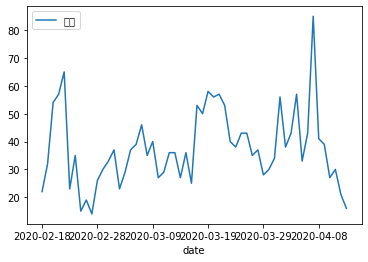

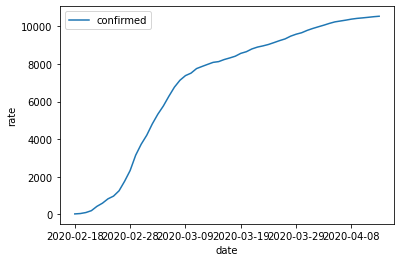

In [40]:
comb_data.plot('date', '대구')
comb_data.plot('date', 'confirmed')

plt.xlabel('date')
plt.ylabel('rate')



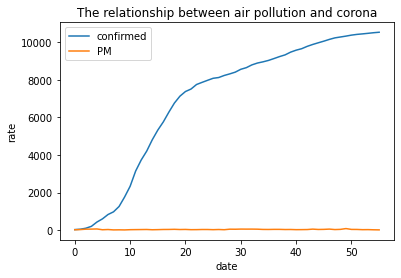

In [38]:
#공기상태 수치와 확진자수를 날짜별로 같이 합친 데이터로 그래프 그리기
#수치차이가 많이 나기 때문에 합쳤을 때는 둘 간의 비교가 어려움
fix_comb_data.plot()

plt.xlabel('date')
plt.ylabel('rate')

plt.title('The relationship between air pollution and corona')
plt.legend(['confirmed','PM']) #PM은 미세먼지수치를 지칭
plt.show()

